In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dataset = pd.read_csv('diamonds.csv', index_col = 0)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,'Ideal','E','SI2',61.5,55.0,326,3.95,3.98,2.43
2,0.21,'Premium','E','SI1',59.8,61.0,326,3.89,3.84,2.31
3,0.23,'Good','E','VS1',56.9,65.0,327,4.05,4.07,2.31
4,0.29,'Premium','I','VS2',62.4,58.0,334,4.20,4.23,2.63
5,0.31,'Good','J','SI2',63.3,58.0,335,4.34,4.35,2.75


#### 1. Побудувати стовпчикові діаграми, на яких відобразити:
    а) кількість діамантів кожного з класів якості; 
    б) середню ціну діамантів кожного класу якості; 
    в) середню глибину діамантів різного класу якості з різною якістю кольору.

<AxesSubplot:xlabel='cut', ylabel='Count'>

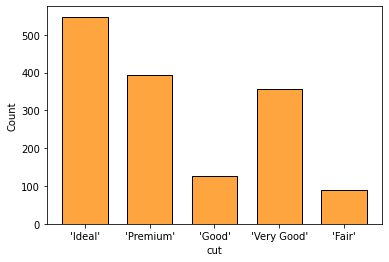

In [94]:
#a
sns.histplot(data = dataset, x = 'cut', color="#ff8700", shrink=.7)

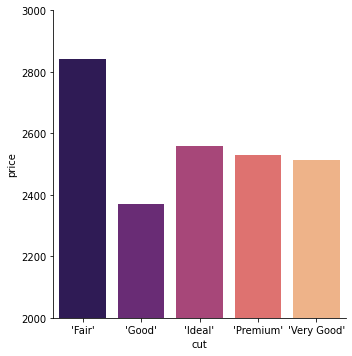

In [95]:
#б
temp = dataset.groupby('cut').mean()
temp.reset_index(inplace=True)
g = sns.catplot(kind = 'bar', data = temp, x = 'cut', y = 'price', palette="magma")
g.set(ylim=(2000, 3000))

[(3.0, 4.2)]

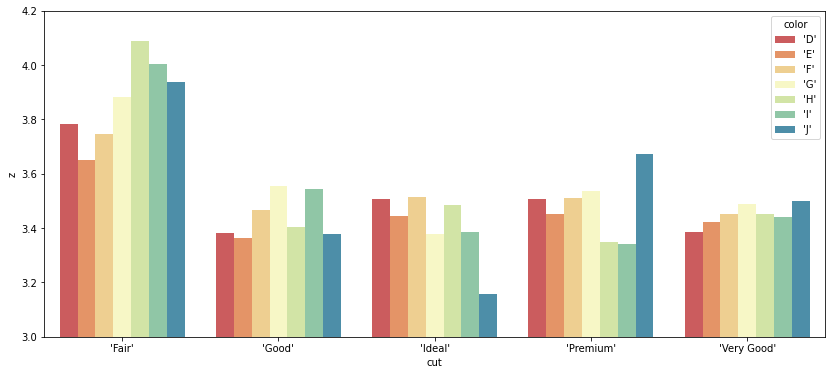

In [96]:
#в

temp = dataset.groupby(['cut', 'color']).mean()
temp.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(14,6))
g = sns.barplot(ax = ax, data = temp, x = 'cut', y = 'z', hue = 'color', palette="Spectral")
g.set(ylim=(3, 4.2))

#### 2. Побудувати гістограму глибини діамантів у відсотках (depth), загальну і для кожного класу якості.

<AxesSubplot:xlabel='depth', ylabel='Count'>

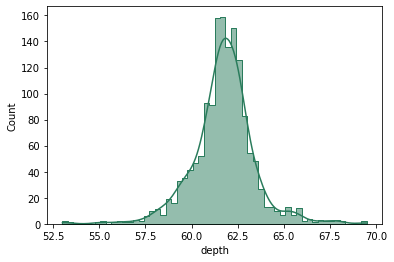

In [97]:
sns.histplot(data = dataset, x = 'depth', kde = True, element="step", color="#2a7c5c")

<AxesSubplot:xlabel='depth', ylabel='Count'>

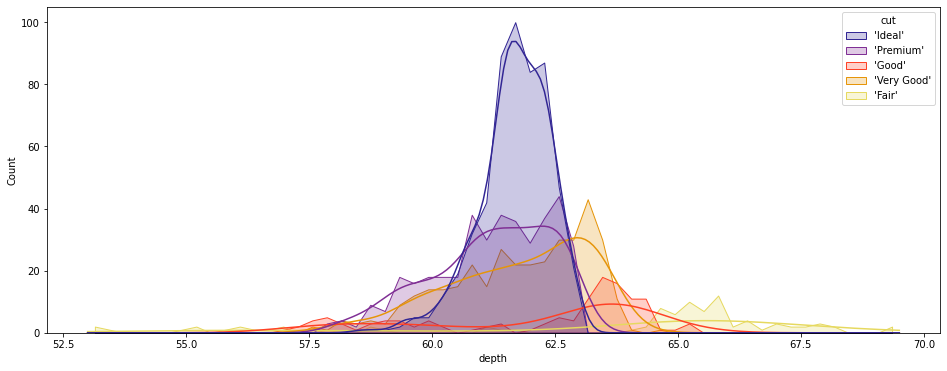

In [98]:

fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(ax = ax, data = dataset, x = 'depth', hue = 'cut', kde = True, element="poly", palette="CMRmap")

#### 3. Побудувати діаграму розмаху параметру table (загальну і в залежності від якості кольору), визначити чи присутні викиди.

<AxesSubplot:xlabel='table'>

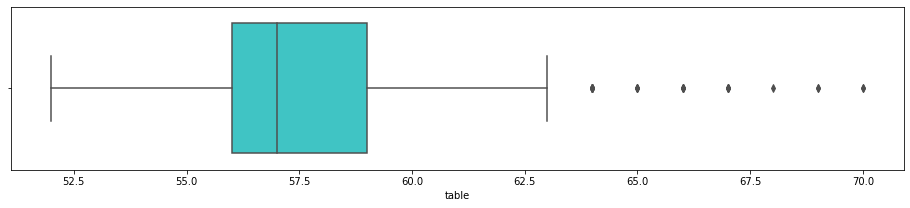

In [99]:
fig, ax = plt.subplots(figsize=(16,3))
sns.boxplot(ax = ax, x = dataset['table'], color="#2adada")

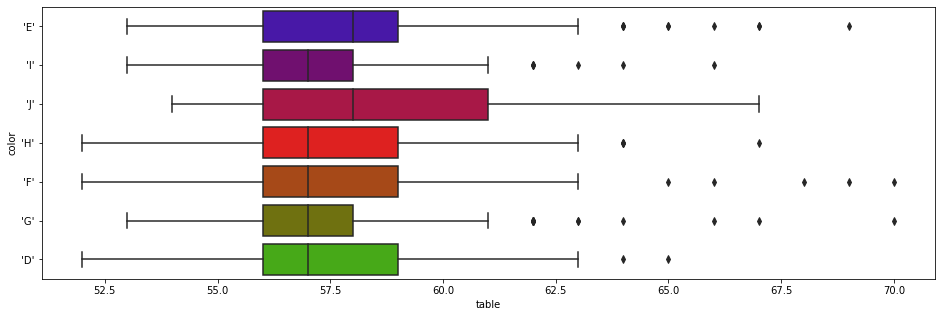

In [100]:
fig, ax = plt.subplots(figsize=(16,5))
g = sns.boxplot(ax = ax, data = dataset, x = 'table', y = 'color', palette="brg")

#### 4. За допомогою діаграм розсіювання зробити висновки щодо залежності між: 
    а) довжиною і шириною; 
    б) глибиною у % і глибиною у мм.

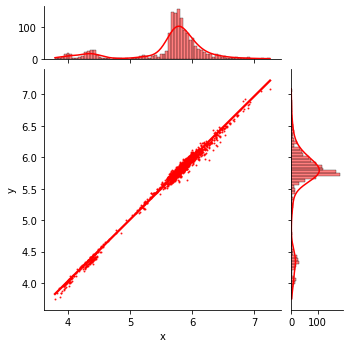

In [101]:
sns.jointplot(data = dataset, x = 'x', y = 'y', kind = 'reg', color="red", 
              scatter_kws={"s":1}, height=5, ratio=4, marginal_ticks=True)

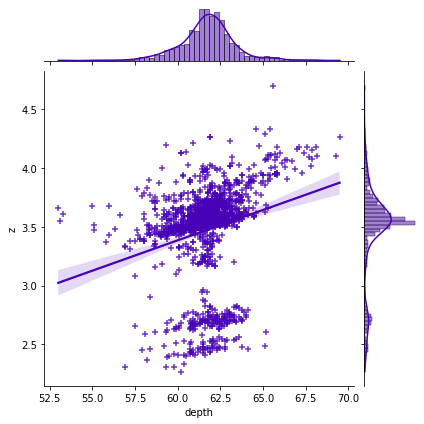

In [102]:
sns.jointplot(data = dataset, x = 'depth', y = 'z', kind = 'reg', marker="+")